In [1]:
import pandas as pd

#define URL where dataset is located
url = "https://raw.githubusercontent.com/Statology/Miscellaneous/main/chicken_egg.txt"

#read in dataset as pandas DataFrame
df = pd.read_csv(url, sep="  ")

#view first five rows of DataFrame
df.head()

C:\Users\zps19\AppData\Local\Temp\ipykernel_16808\4163989256.py:7: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv(url, sep="  ")


,year,chicken,egg
0,1930,468491,3581
1,1931,449743,3532
2,1932,436815,3327
3,1933,444523,3255
4,1934,433937,3156


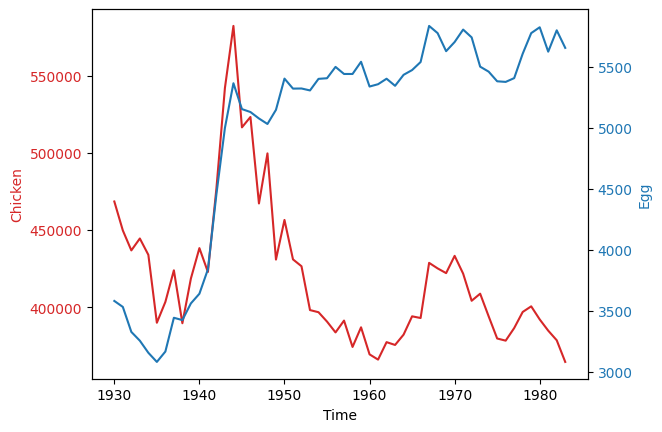

In [3]:
# plot the chicken and egg data as two lines with different y axes
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Time')
ax1.set_ylabel('Chicken', color=color)
ax1.plot(df['year'], df['chicken'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('Egg', color=color)
ax2.plot(df['year'], df['egg'], color=color)
ax2.tick_params(axis='y', labelcolor=color)


In [5]:
!pip install statsmodels

     ---------------------------------------- 9.1/9.1 MB 12.4 MB/s eta 0:00:00
     -------------------------------------- 233.8/233.8 kB 7.0 MB/s eta 0:00:00


In [6]:
from statsmodels.tsa.stattools import grangercausalitytests

#perform Granger-Causality test
grangercausalitytests(df[['chicken', 'egg']], maxlag=[3])



Granger Causality
number of lags (no zero) 3
ssr based F test:         F=5.4050  , p=0.0030  , df_denom=44, df_num=3
ssr based chi2 test:   chi2=18.7946 , p=0.0003  , df=3
likelihood ratio test: chi2=16.0003 , p=0.0011  , df=3
parameter F test:         F=5.4050  , p=0.0030  , df_denom=44, df_num=3


{3: ({'ssr_ftest': (5.4049843723350595, 0.0029663974455763015, 44.0, 3),
   'ssr_chi2test': (18.794604749256003, 0.0003014773550056942, 3),
   'lrtest': (16.000284988230078, 0.0011338317398183065, 3),
   'params_ftest': (5.404984372328387, 0.0029663974455968554, 44.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 0., 0., 1., 0.]])])}